In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
df=pd.read_csv('train.csv')

In [3]:
df.head(10)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df['ApplicantIncome'].hist(bins=50)

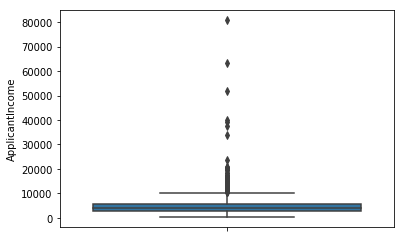

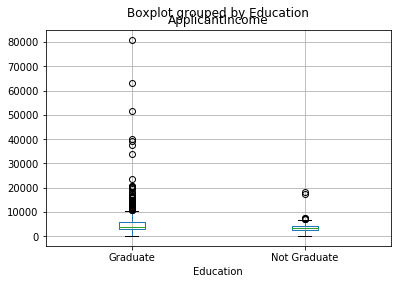

In [12]:
import seaborn as sns
sns.boxplot(df['ApplicantIncome'],orient='v')
df.boxplot(column='ApplicantIncome',by='Education')

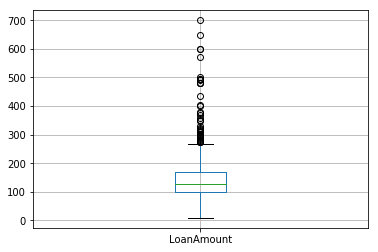

In [13]:
df.boxplot(column='LoanAmount')

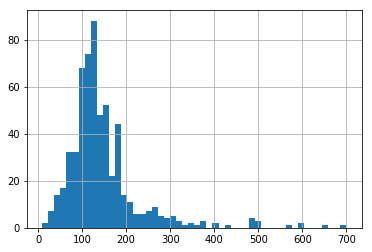

In [14]:
df['LoanAmount'].hist(bins=50)

In [15]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


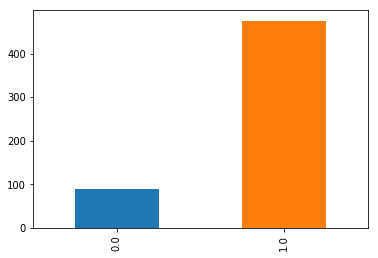

In [22]:
#let us understand credit history and loan status Cat value analysis
temp1=df['Credit_History'].value_counts(ascending=True)
temp1.plot(kind='bar')

                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


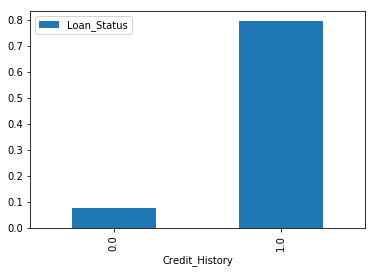

In [24]:
temp2=df.pivot_table(values='Loan_Status',index='Credit_History',aggfunc=lambda x:x.map({'Y':1,'N':0}).mean())
temp2.plot(kind='bar')
print(temp2)

In [27]:
temp3=pd.crosstab(df['Credit_History'],df['Loan_Status'])
temp3

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


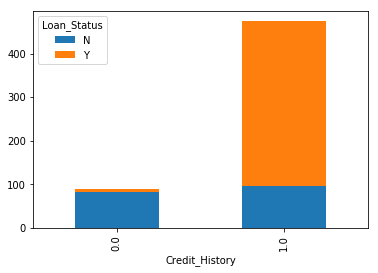

In [29]:
temp3.plot(kind='bar',stacked=True)

In [52]:
#indexing
#For instance, we want a list of all females who are not graduate and got a loan.
df.loc[(df['Gender']=='Female') & (df["Education"]=="Not Graduate") & (df['Loan_Status']=='Y'),].head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
50,LP001155,Female,Yes,0,Not Graduate,No,1928,1644.0,100.0,360.0,1.0,Semiurban,Y
197,LP001669,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y
205,LP001692,Female,No,0,Not Graduate,No,4408,0.0,120.0,360.0,1.0,Semiurban,Y
279,LP001908,Female,Yes,0,Not Graduate,No,4100,0.0,124.0,360.0,NaN,Rural,Y
403,LP002300,Female,No,0,Not Graduate,No,1963,0.0,53.0,360.0,1.0,Semiurban,Y


In [57]:
#missing values per columns
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [67]:
#using apply method for same
def missing_values(df):
    return sum(df.isnull())
df.apply(missing_values,axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [75]:
#imputing missing values can be done with fillna()
#sorting dataframes can be done with df.sort_values

In [79]:
data=df
data.pivot_table(values='LoanAmount',index=["Gender","Married","Self_Employed"],aggfunc=np.mean)

LoanAmount
Gender Married Self_Employed            
Female No      No             110.596774
               Yes            125.800000
       Yes     No             135.480000
               Yes            282.250000
Male   No      No             128.137255
               Yes            173.625000
       Yes     No             151.709220
               Yes            169.355556

In [81]:
#here we will do binning of loan amount
df['LoanAmount'].describe()


count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [108]:
cut_points=[90,140,190]
labels=['medium','high']
data['bins']=pd.cut(df['LoanAmount'],cut_points,labels=labels,include_lowest=True)

In [109]:
data['bins']
pd.value_counts(data['bins'])

medium    271
high      132
Name: bins, dtype: int64

In [121]:
#Coding LoanStatus as Y=1, N=0:#not correct use label encoding
print('Before Coding:')
print(pd.value_counts(data["Loan_Status"]))
print('after coding:')
print(pd.value_counts(data['Loan_Status'].apply(lambda x:x.replace('Y','1'))))

Before Coding:
Y    422
N    192
Name: Loan_Status, dtype: int64
after coding:
1    422
N    192
Name: Loan_Status, dtype: int64


In [126]:
#check the missing values in dataset
#df.isnull().sum()
df.apply(lambda x:x.isnull().sum())

Loan_ID                0
Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            22
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
bins                 211
dtype: int64

In [127]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [128]:
df.apply(lambda x:x.isnull().sum())

Loan_ID                0
Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
bins                 211
dtype: int64

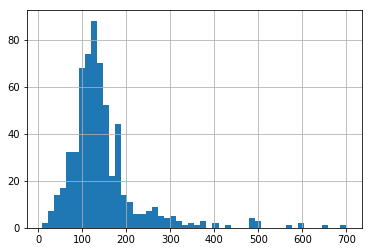

In [129]:
df['LoanAmount'].hist(bins=50)

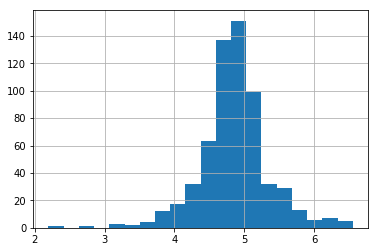

In [131]:
df['LoanAmount_log']=np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

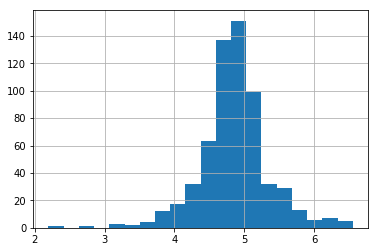

In [134]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['LoanAmount_log'].hist(bins=20) 
